# Project Description

The online store Ice sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. In this project, I am going to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating such as Teen or Mature.

I am performing the following steps to complete the project:

**Step 1. Open the data file and study the general information**

**Step 2. Prepare the data**

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- Fill in the missing values when possible and trying to find out why the values are missing.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

**Step 3. Analyze the data**

- Observing the games were released in different years.
- Observing the game sales varied from platform to platform and choosing the platforms with the greatest total sales to build distribution based on data for each year.
- Finding platforms that used to be popular but now have zero sales.
- Finding how long does it generally take for new platforms to appear and old ones to fade
- Choosing the data to predict its future sales and pointing out the platforms are leading in sales, that are growing or shrinking and finding potentially profitable platforms.
- Building a box plot for the global sales of all games, broken down by platform to observe sales differences.
- Finding the relationship between a user and professional reviews with sales through scatterplot.
- Look at the general distribution of games by genre.


**Step 4. Create a user profile for each region**

- For each region (NA, EU, JP), determining:
  - The top five platforms. Describe variations in their market shares from region to region.
  - The top five genres. Explain the difference.
  - Do ESRB ratings affect sales in individual regions?

**Step 5. Test the following hypotheses:**

- Average user ratings of the Xbox One and PC platforms are the same. 
- Average user ratings for the Action and Sports genres are different.

**Step 6. Write a general conclusion**


**Data description**

- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million) 
- EU_sales (sales in Europe in USD million) 
- JP_sales (sales in Japan in USD million) 
- Other_sales (sales in other countries in USD million) 
- Critic_Score (maximum of 100) 
- User_Score (maximum of 10) 
- Rating (ESRB)


# Step 1. Open the data file and study the general information. <a class="anchor" id="Step 1"></a>

**Importing necessary python libraries**

In [1]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from statsmodels.stats import weightstats as statsmodelsweightstats
from statsmodels.stats.weightstats import ttest_ind
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_columns', 50)

**Reading the CSV file containing our dataset**

In [3]:
##reading a csv file containing users data
try:
    data = pd.read_csv("/Users/rsavy/Downloads/games.csv")
    
except:
    data = pd.read_csv("/datasets/games.csv")

**Printing the first 10 rows of dataset to get a general ideas on how our data look like**

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Observing the datatypes and total entries in each columns**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Observing the counts of missing values**

In [6]:
count = data.isnull().sum()
percent = (count / data.shape[0]) * 100
print('Following are the count of Missing values in each columns of dataset:',count)
print()
print('Following are the percent of Missing values in each columns of dataset:',percent)

Following are the count of Missing values in each columns of dataset: Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Following are the percent of Missing values in each columns of dataset: Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64


 **Statistical Summary**

In [7]:
print('Following are the general Statistical Summary of the dataset:')
data.describe()

Following are the general Statistical Summary of the dataset:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
print('There are',data.duplicated().sum(), 'duplicate values in dataset')

There are 0 duplicate values in dataset


### Conclusion

1. We will be dealing with various datatypes in this dataset. We will need to change some datatypes into appropriate format such as **year_of_release** into datetime from float64.

2. We have missing values in the follwing columns and we will be filling in missing values where it is possible to do so:
    - **name**
    - **year_of_release**
    - **genre**
    - **critical_score**
    - **user_score**
    - **rating**
3. We observed the general statistical summary of the dataset.
4. We do not have any duplicates in the dataset.

# Step 2. Data preprocessing

**Making the Column Names Lowercase**

In [9]:
data= data.rename(columns=str.lower)

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Converted all column names to lowercase.

**Convert the data to the required Datatypes**

In [11]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

- Changed the type of **year_of_release** from float datatype to datatime

In [12]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')


- Changed the type of user_score from string to numeric by setting **errors = 'coerce'** so that it will change all non-numeric values to **'NaN'**. In our case, 'tbh' is be converted into 'NaN'.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


**Handling Missing Values**

In [14]:
count = data.isnull().sum()
percent = (count / data.shape[0]) * 100
print('Following are the count of Missing values in each columns of dataset:',count)
print()
print('Following are the percent of Missing values in each columns of dataset:',percent)

Following are the count of Missing values in each columns of dataset: name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Following are the percent of Missing values in each columns of dataset: name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


- We have very tiny percentage of missing values in columns **name**,**year_of_release**, and **genre**. I am going to slice out those values from our analysis as we can delete missing values from our analysis without any risk if it is less than 10% of whole data. In our case, it is less than 2%.

In [15]:
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['year_of_release'], inplace=True)
data.dropna(subset=['genre'], inplace=True)

In [16]:
null_data = data[data.isnull().any(axis=1)]
null_data.tail(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16660,Prison Architect,XOne,2016-01-01,Action,0.01,0.00,0.00,0.0,74.0,6.7,NaN
16661,Bookworm Deluxe,PC,2006-01-01,Puzzle,0.01,0.00,0.00,0.0,NaN,8.0,E
16662,Hakuoki: Reimeiroku - Omouhase Kara,PSV,2015-01-01,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007-01-01,Fighting,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16665,Sweet Honey Coming,PS2,2009-01-01,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16666,Psychic Detective,PS,1995-01-01,Adventure,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16667,Hanasaku Manimani,PSV,2014-01-01,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014-01-01,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16669,Super Robot Taisen: Original Generation,GBA,2002-01-01,Role-Playing,0.01,0.00,0.00,0.0,72.0,NaN,T
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008-01-01,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [17]:
null_data.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999-01-01,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990-01-01,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006-01-01,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989-01-01,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988-01-01,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [18]:
null_data.sample(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12926,Defendin' De Penguin,Wii,2008-01-01,Strategy,0.05,0.00,0.00,0.00,NaN,NaN,NaN
5537,Dr. Mario / Puzzle League,GBA,2005-01-01,Puzzle,0.12,0.04,0.16,0.01,74.0,NaN,E
15025,Foto Showdown,DS,2010-01-01,Role-Playing,0.02,0.00,0.00,0.00,NaN,NaN,E
15834,Memories Off: Yubikiri no Kioku,X360,2010-01-01,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4448,Power Rangers: S.P.D.,GBA,2004-01-01,Action,0.31,0.12,0.00,0.01,NaN,NaN,E10+
1659,Star Wars Episode 1: Jedi Power Battles,PS,1999-01-01,Action,0.66,0.48,0.01,0.06,NaN,NaN,NaN
4962,Super Soccer,SNES,1991-01-01,Sports,0.00,0.00,0.38,0.00,NaN,NaN,NaN
1051,FIFA Soccer 10,PS2,2009-01-01,Sports,0.23,0.24,0.00,1.23,NaN,8.4,E
8077,Pro Yaky? Spirits 2011,PS3,2011-01-01,Sports,0.00,0.00,0.18,0.00,NaN,NaN,NaN
14129,Double Value!: ATV Thunder Ridge Riders / Mons...,DS,2007-01-01,Racing,0.03,0.00,0.00,0.00,NaN,NaN,NaN


- I observed for majority of data, we have missing values in critic_score and user_score with games that has low amount of sales. So that means, if there are no buyers or very small number of buyers, there is no or very little less chances of getting rating and reviews in the products.

**Observing Rating Columns**

In [19]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [21]:
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016-01-01,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Now, I am filling in missing values in **rating** with the most repeated **rating value** grouped by its **genre**. As **rating** has specific value and it is categorical data, it would be better to use Mode or most frequent value as mean or median calculation is not possible in this case.

In [22]:
#rating= data.groupby('genre')['rating'].agg(pd.Series.mode)
#data['rating'] = data.groupby('genre')['rating'].fillna(value=rating)
#data.head()

def fill_rating(data):
    for name, group in data.groupby(by=['genre'])['rating']:
        groupMode = group.dropna().mode().values[0]
        data.loc[(data['genre'] == name) & (data['rating'] != data['rating']), 'rating'] = groupMode
    
fill_rating(data)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T


**Critic Score**

In [23]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [24]:
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.0,NaN,NaN,T
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.0,NaN,NaN,E
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,E
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.0,NaN,NaN,E
16714,Winning Post 8 2016,PSV,2016-01-01,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,E


In [25]:
print("Mean")
mean = data.groupby('genre')['critic_score'].mean()
print(mean)

print()
print("Median")
median = data.groupby('genre')['critic_score'].median()
                      
print(median)

Mean
genre
Action          66.676931
Adventure       65.268750
Fighting        69.155556
Misc            66.648330
Platform        68.124490
Puzzle          67.231818
Racing          68.006897
Role-Playing    72.655267
Shooter         70.260022
Simulation      68.609195
Sports          71.993133
Strategy        72.158784
Name: critic_score, dtype: float64

Median
genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.5
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64


- I am going to fill in missing values in **critic_score** with mean value grouped by genre as there is not much differences between mean and median.

In [26]:
data['critic_score'] = data.groupby('genre')['critic_score'].apply(lambda x:x.fillna(x.median()))
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,69.5,NaN,E
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,T


In [27]:
print("Mean")
mean_user = data.groupby(['genre'])['user_score'].mean()
print(mean_user)

print()
print("Median")
median_user = data.groupby(['genre'])['user_score'].median()
print(median_user)

Mean
genre
Action          7.058129
Adventure       7.139597
Fighting        7.295949
Misc            6.805828
Platform        7.305896
Puzzle          7.138400
Racing          7.040859
Role-Playing    7.624423
Shooter         7.053260
Simulation      7.132153
Sports          6.951434
Strategy        7.294426
Name: user_score, dtype: float64

Median
genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64


- I am going to fill in missing values in **user_score** with mean value grouped by genre as there is not much differences between mean and median.

In [28]:
data['user_score'] = data.groupby('genre')['user_score'].apply(lambda x:x.fillna(x.median()))
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,69.5,7.7,E
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T


**Calculating the Total sales (the sum of sales in all regions)**

In [29]:
data['total_sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [30]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,69.5,7.7,E,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38


In [31]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sale         0
dtype: int64

### Conclusion
In this module, I performed the following Task:

- Converted all column names to lowercase.
- Changed the type of year_of_release from float datatype to datatime
- Changed the type of user_score from string to numeric by setting **errors = 'coerce'** so that it will change all non-numeric values to **'NaN'**. In our case, 'tbh' is be converted into 'NaN'.
- We had very tiny percentage of missing values in columns **name**,**year_of_release**, and **genre**. I sliced them out from our data as we can delete missing values from our analysis without any risk if it is less than 10% of whole data. In our case, it is less than 2%.

For majority of data, we have missing values in critic_score and user_score with games that has low amount of sales; sometimes, if there are very small number of buyers, there is no or very little less chances of getting rating and reviews in the products. Other reasons could be, it could be a human or technical errors during data entry or because of optionality of the fields.

- Filled in missing values in **rating** with the most repeated **rating value** grouped by its **genre**.
- Filled in missing values in **critic_score** and **user_score** columns with mean value grouped by its **genre**.
-  Calculated the total sales (the sum of sales in all regions) for each game and saved values in **total_sale** column.

# Step 3: Analyze the Data

**Total Games Released in Different Years**

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64


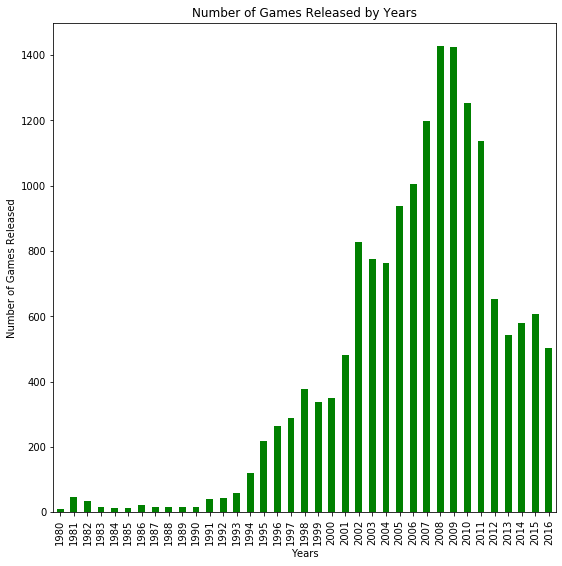

In [32]:
data['year_of_release'] = data['year_of_release'].dt.year
games_by_year = data['year_of_release'].value_counts()
print(games_by_year)
pd.value_counts(data.year_of_release).sort_index(axis=0).plot(kind='bar', color='green', figsize=(9,9))
plt.title('Number of Games Released by Years')
plt.xlabel("Years")
plt.ylabel("Number of Games Released");

- In 1980 there were only 9 games released. The game production spiked dramatically between 1993 and 2008 and hit all time highest game release of 1427 in 2008 and 1427 in 2009 and **declined** to **502** games release in 2016.
- The highest number of games were released between 2006 and 2011.
- There could have been decrease of number of games 2012 and 2016 because most of the users preferred playing same kind of games, we will observe this in detail in the next step.


**Sales Grouped By Platforms**

In [33]:
data.groupby('platform')['total_sale'].sum().sort_values(ascending= False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sale, dtype: float64

- PS2 has the highest total sale of **1.233** billion dollars (in USD)

**Platform with the Highest Total Sales: PS2**

In [34]:
ps2_data = data.query('platform == "PS2"')


In [35]:
ps2_data['year_of_release'] = pd.to_datetime(ps2_data['year_of_release'], format = '%Y')
ps2_data['year_of_release'] = ps2_data['year_of_release'].dt.year


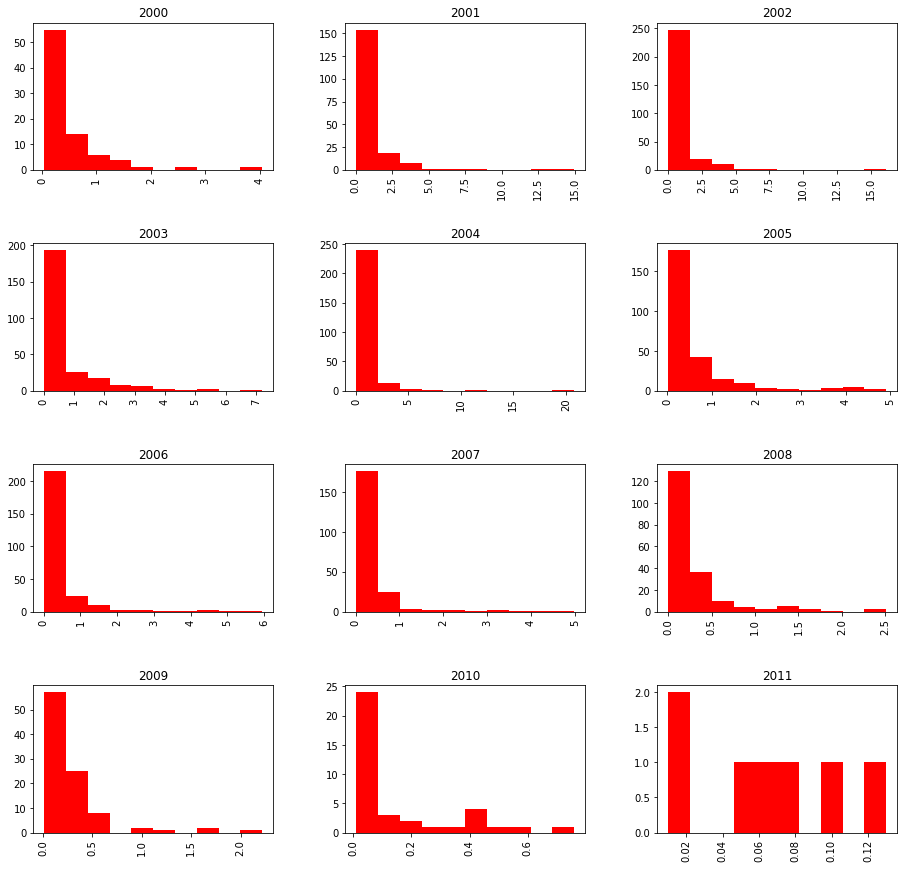

In [36]:
ps2_data['total_sale'].hist(by=ps2_data['year_of_release'], color='red',figsize=(15,15));

- We can see the total sales distribution for **PS2** platform is **right skewed** for all years. That means **Mean value is greater than Median value** of total sales.

**Exploring Various Platforms and their Sales**

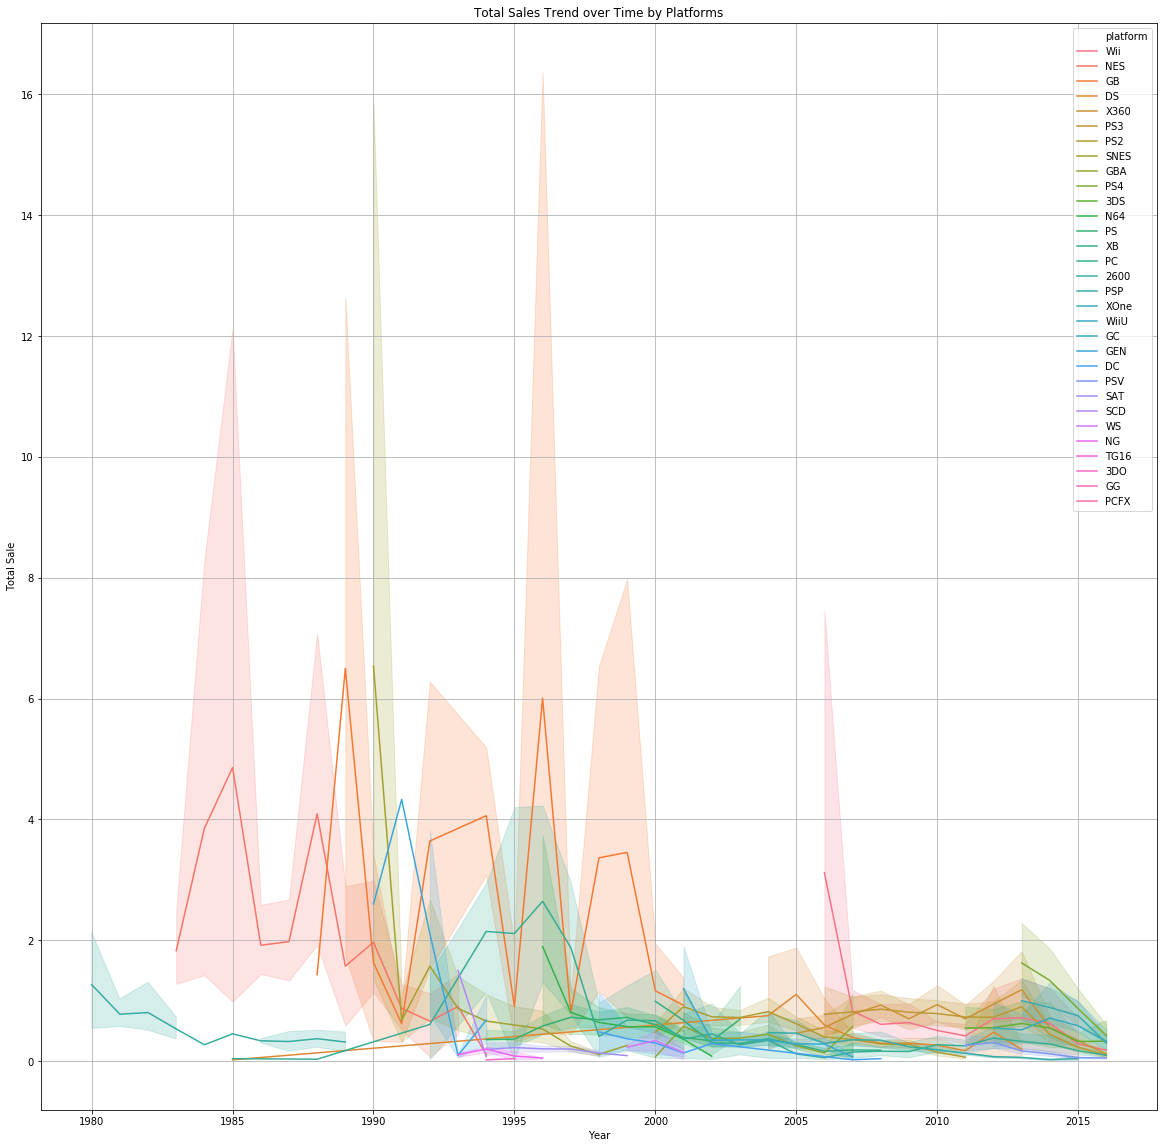

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.lineplot(x='year_of_release',y='total_sale', hue='platform', data=data, ax=ax);
plt.xlabel("Year")
plt.ylabel("Total Sale")
plt.title('Total Sales Trend over Time by Platforms')
plt.grid()
plt.show()

- Most of the platforms survived for only 6-8 years. It takes around 2-3 years for one platform to fade away and another platform to rise.
- The **DS, PSP**, and **PC** platforms survived in market for longer period of time.
- The **DS**, **GC** and **PS2** platform which once had highest sales that fell down to 0 in later years.

- The **SDC and NG** were some of the game platforms which were able to gain market for very less time during (2-4 years) during early and late 90s and faded away.
- The **3DO** platform could survive for a year and faded away.

**Observing the Platforms between 2014-2016**

- I am only including data since 2014. We see that the leader in sales for the entire history of the PS2. But sales by 2011 are already zero. The X360 was at its peak in 2010, but by 2016 it had fallen to almost 0. In general, a sharp decline in the platform can occur in just 3 years. Let's look at this sales horizon.

In [38]:
filtered_data =data.query('year_of_release==2014 or year_of_release==2015 or year_of_release==2014')
filtered_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,T,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,7.4,M,7.98


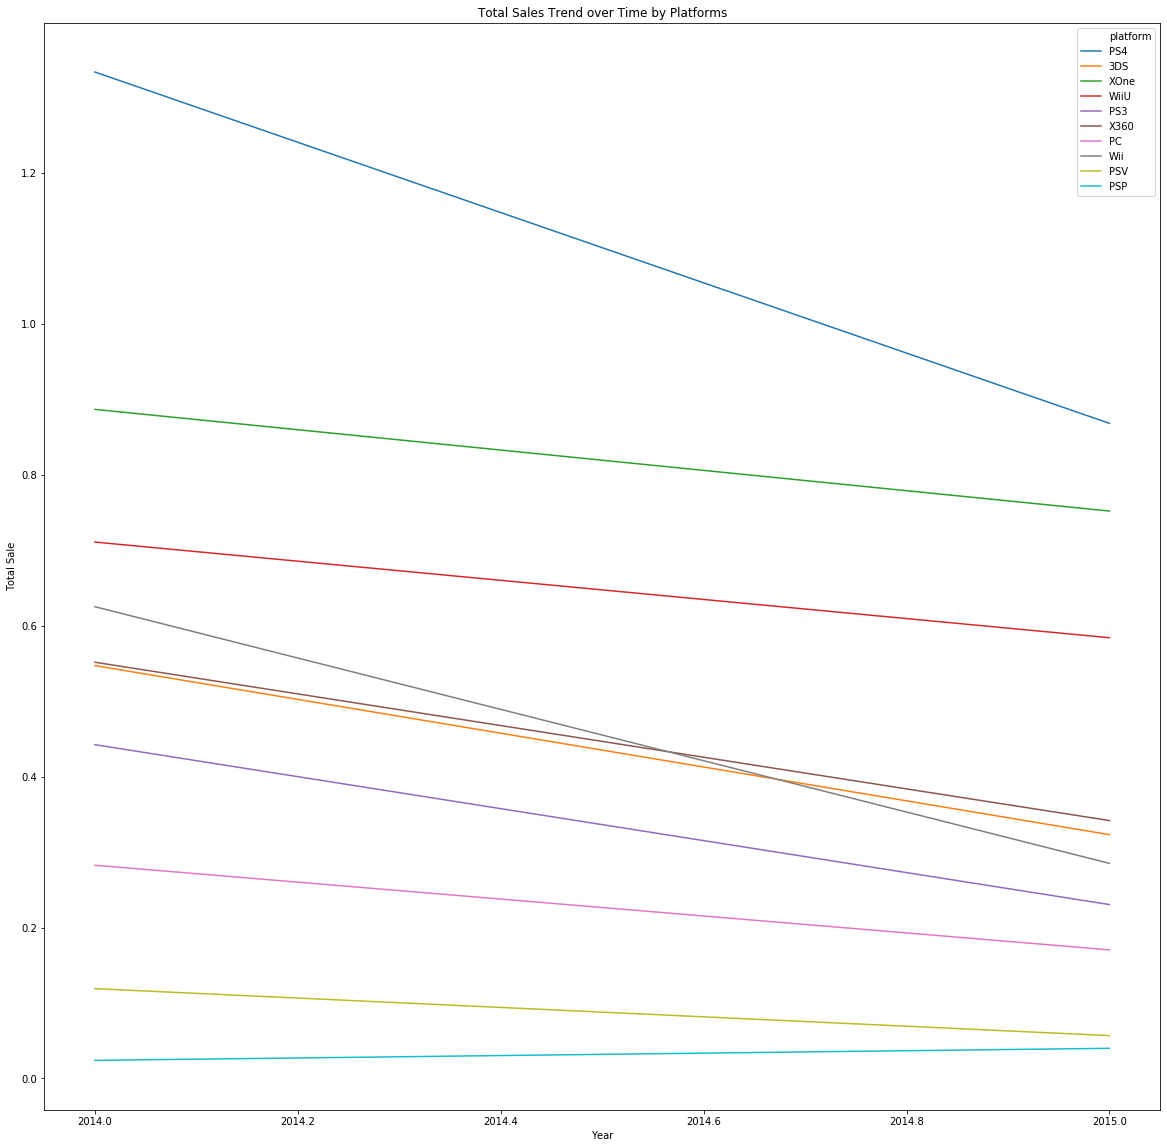

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.lineplot(x='year_of_release',y='total_sale',ci=None, hue='platform', data=filtered_data)
plt.xlabel("Year")
plt.ylabel("Total Sale")
plt.title('Total Sales Trend over Time by Platforms');

- **PS4** dominates the market in 2016 which is followed by WiiU and XOne even though these platforms are falling dowm by time.There 3 platforms were first released after 2012 and still are able to dominate the market.Hence, these are the most profitable platforms.
- PSP platform games are least sold game. However, it is only platform maintaining its steady growth so it has a potentiality to grow in future.

**Box plot for the global sales of all games, broken down by platform**

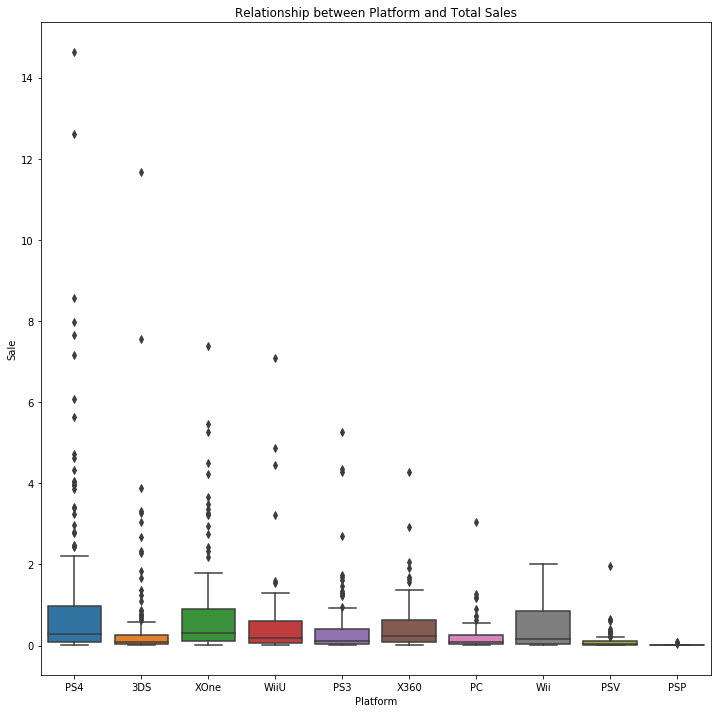

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure();
fig=plt.gcf()
fig.set_size_inches(12,12)
sns.boxplot(x='platform',y='total_sale', data= filtered_data)
plt.xlabel("Platform")
plt.ylabel("Sale")
plt.title('Relationship between Platform and Total Sales')
plt.show()
plt.clf()

- **Wii, PS3, and PS4** are the most popular platforms.

**Box plot for the Average sales of all games, broken down by platform**

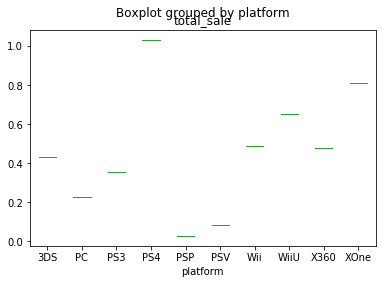

In [41]:
avg = pd.pivot_table(filtered_data, values='total_sale', index='platform', aggfunc='mean').boxplot(by='platform', column=['total_sale'], grid=False);

### The correlation between Reviews and sales

In [42]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38


Text(0.5, 1.0, 'Relationship between Critic Score and Total Sales')

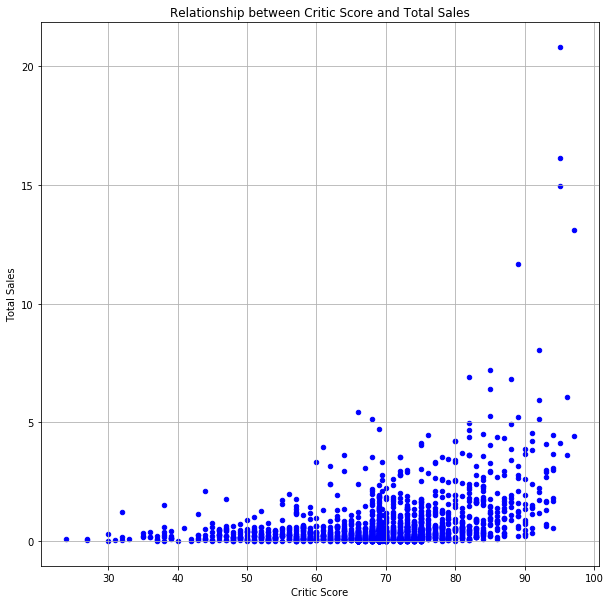

In [43]:
ps2_data.plot.scatter(x='critic_score',y='total_sale',grid=True, color='blue',figsize=(10,10))
plt.xlabel("Critic Score")
plt.ylabel("Total Sales")
plt.title('Relationship between Critic Score and Total Sales')

Text(0.5, 1.0, 'Relationship between Critic Score and Total Sales')

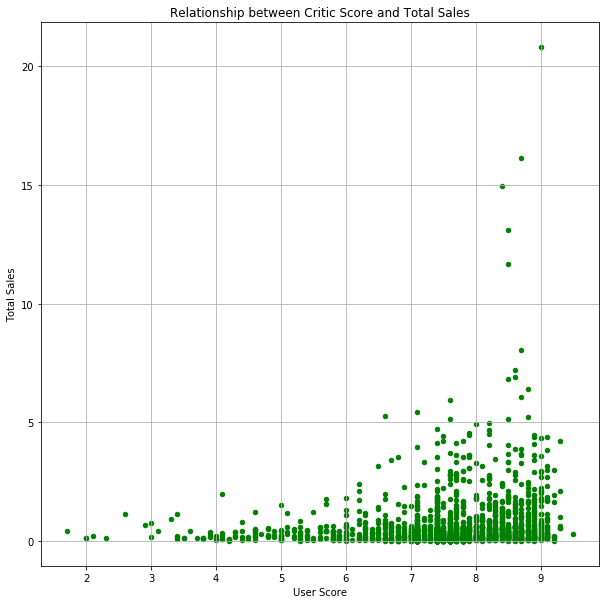

In [44]:
ps2_data.plot.scatter(x='user_score',y='total_sale',grid=True, color='green',figsize=(10,10))
plt.xlabel("User Score")
plt.ylabel("Total Sales")
plt.title('Relationship between Critic Score and Total Sales')

In [45]:
corr_data= ps2_data[['critic_score','user_score','total_sale']]
corr_data.corr()

,critic_score,user_score,total_sale
critic_score,1.000000,0.502550,0.350082
user_score,0.502550,1.000000,0.176364
total_sale,0.350082,0.176364,1.000000


- There is a weak positive relationship between the critic_score and total_sales.
- There is no relationship between user_score and total_sales.

### General Distribution of Games by Genre

In [46]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

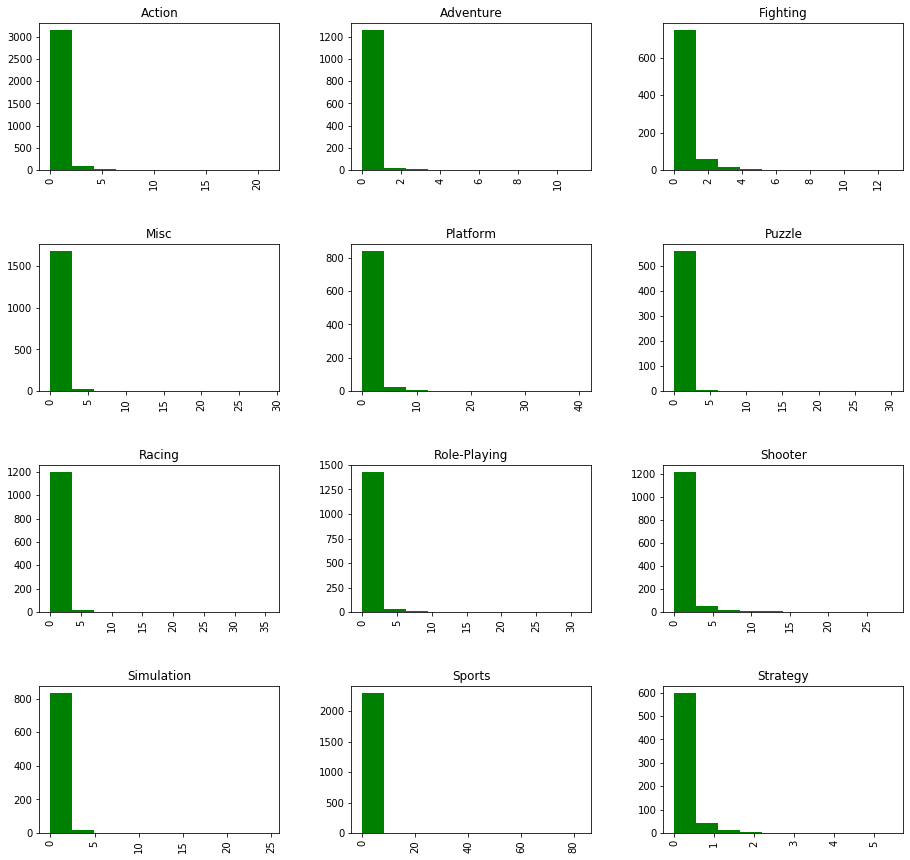

In [47]:
data['total_sale'].hist(by=data['genre'], color='green',figsize=(15,15));

The Sales distribution of games by genre is right skewed That means Mean value is greater than Median value of total sales.

**Conclusion**

**Total Games Released in Different Years**
- In 1980 there were only 9 games released. The game production spiked dramatically between 1993 and 2008 and hit all time highest game release of 1427 in 2008 and 1427 in 2009 and **declined** to **502** games release in 2016.
- The highest number of games were released between 2006 and 2011.

**Sales Grouped By Platforms**
- PS2 has the highest total sale of 1.233 billion dollars (in USD).
- The total sales distribution for **PS2** platform is **right skewed** for all years. That means **Mean value is greater than Median value** of total sales.

**Exploring Various Platforms and their Sales**
- Most of the platforms survived for only 6-8 years. It takes around 2-3 years for one platform to fade away and another platform to rise.
- The **DS, PSP**, and **PC** platforms survived in market for longer period of time.
- The **DS**, **GC** and **PS2** platform which once had highest sales that fell down to 0 in later years.

- The **SDC and NG** were some of the game platforms which were able to gain market for very less time during (2-4 years) during early and late 90s and faded away.
- The **3DO** platform could survive for a year and faded away.

**Observing the Platforms which Survived after 2014**
- **PS4** dominates the market in 2016 which is followed by WiiU and XOne even though these platforms are falling dowm by time.There 3 platforms were first released after 2012 and still are able to dominate the market.Hence, these are the most profitable platforms.
- PSP platform games are least sold game. However, it is only platform maintaining its steady growth so it has a potentiality to grow in future.


** **Wii, PS3, and PS4** are the most popular platforms.

- There is a weak positive relationship between the critic_score and total_sales.
- There is no relationship between user_score and total_sales.

The Sales distribution of games by genre is right skewed That means Mean value is greater than Median value of total sales.

# Step 4: Creating a User Profile for Each Region

In [48]:
#Sales Data for North America
NA_data = data[['name','platform','genre','na_sales','rating']]

#Sales Data for Europe
EU_data = data[['name','platform','genre','eu_sales','rating']]

#Sales Data for Japan
JP_data = data[['name','platform','jp_sales','genre','rating']]

**Total Sales in North America, Europe and Japan Grouped by Platforms**

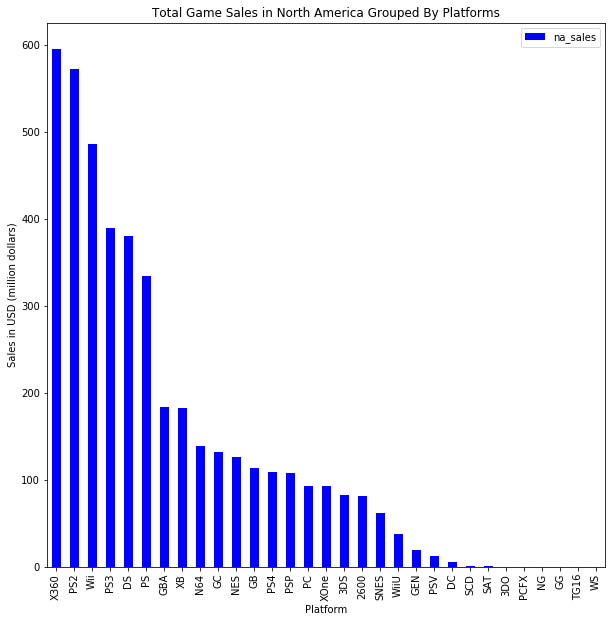

In [49]:
NA_platform = pd.pivot_table(NA_data, values='na_sales', index=['platform'], aggfunc= np.sum)
NA_platform.sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(10,10),color='blue')
plt.xlabel("Platform")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in North America Grouped By Platforms");

- X360 Platform Games generate the highest amounnt of Sales in North American Countries with almost 600 million dollars in Sales.
- PS2 platform Games generates second highest amount of Sales in North America followed by Wii platform games.
- The top 5 popular platforms in North America are **X360, PS2, Wii, PS3, and DS**.
- The game platforms which are unpopular in North America are **SDC, SAT, 3DO, PCFX, NG, TG16 and WS**.

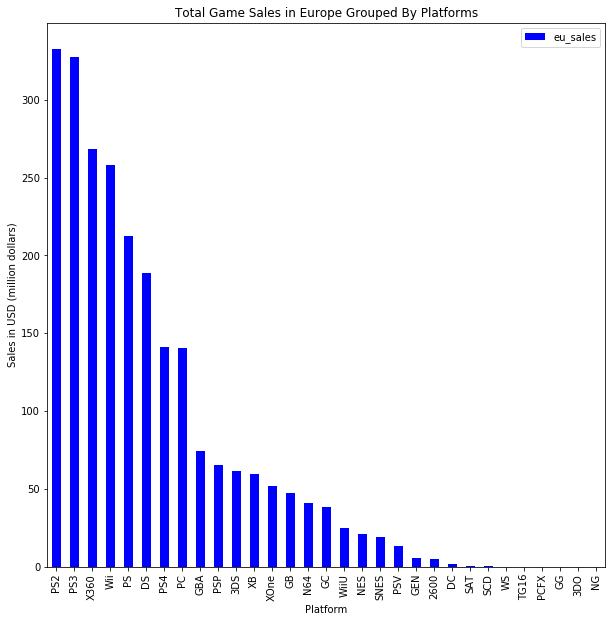

In [50]:
EU_platform = pd.pivot_table(EU_data,values='eu_sales', index=['platform'], aggfunc= np.sum)
EU_platform.sort_values(by='eu_sales', ascending=False).plot(kind='bar',figsize=(10,10),color='blue')
plt.xlabel("Platform")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in Europe Grouped By Platforms");

- PS2 Platform Games generate the highest amount of Sales in European Countries with almost 330 million dollars in Sales.
- PS3 platform Games generates second highest amount of Sales (Approx.320 million dollars) in Europe followed by X360 platform games.
- The top 5 popular platforms in Europe are **PS2, PS3, X360, Wii, PS**.
- The most unpopular game platforms in Europe are **SAT, SDC, WS, TG16,PCFX,GG,3DO,NG** as they dont have any sales in Europe.

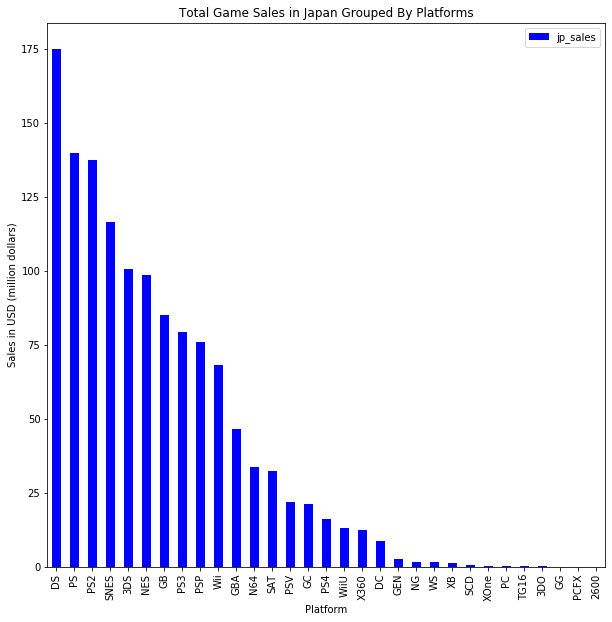

In [51]:
JP_platform = pd.pivot_table(JP_data,values='jp_sales', index=['platform'], aggfunc= np.sum)
JP_platform.sort_values(by='jp_sales', ascending=False).plot(kind='bar',figsize=(10,10),color='blue')
plt.xlabel("Platform")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in Japan Grouped By Platforms");

- DS Platform Games dominates the market in japan with total sales of 175 million dollars.
- PS platform Games generates the second highest amount of Sales Revenue (Approx.135 million dollars) in Japan followed by PS2 platform games.
- The top 5 popular platforms in Japan are **DS, PS, PS2, SNES, and 3DS**.
- The most unpopular and unsold game platforms in Japan are **PC, TG16, 3DO,GG,PCFX,2600**.

**Total Sales in North America, Europe and Japan Grouped by Genre**

          na_sales
genre             
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57


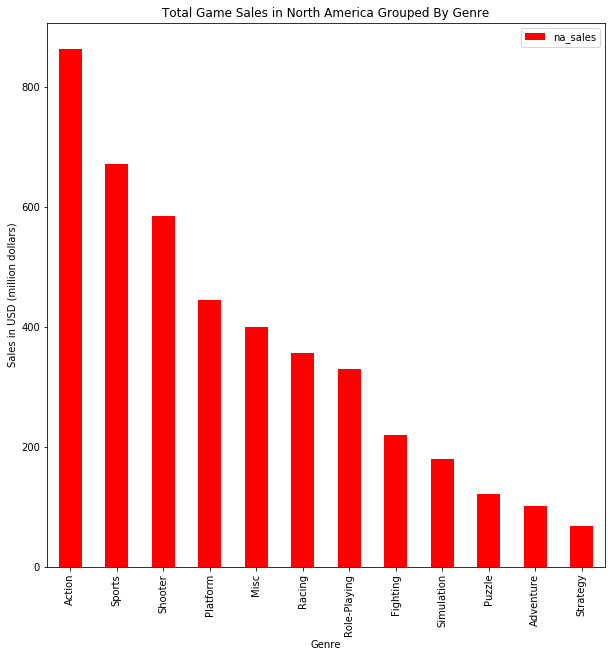

In [52]:
NA_genre = pd.pivot_table(NA_data, values='na_sales', index=['genre'], aggfunc= np.sum)
print(NA_genre.sort_values(by='na_sales', ascending=False).head())
NA_genre.sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(10,10), color='red')
plt.xlabel("Genre")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in North America Grouped By Genre");

- Action Games are most popular in North America which has total sales of 863.17 million dollars.
- The second most popular genre in North America is Sports with sales of 671.20 million dollars.
- The top 5 popular genre games sold in North America are **Action, Sports, Shooter, Platform, and Misc**.
- The least popular genre game in North America are **Strategy** and **Adventure**

         eu_sales
genre            
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60


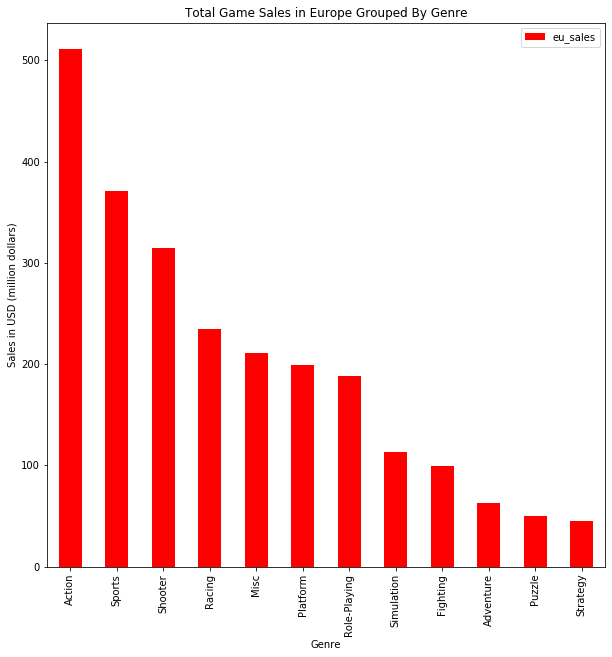

In [53]:
EU_genre = pd.pivot_table(EU_data, values='eu_sales', index=['genre'], aggfunc= np.sum)
print(EU_genre.sort_values(by='eu_sales', ascending=False).head())

EU_genre.sort_values(by='eu_sales', ascending=False).plot(kind='bar',figsize=(10,10),color='red')
plt.xlabel("Genre")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in Europe Grouped By Genre");

- Action Games are most popular in Europe which has total sales of 510.99 million dollars.
- The second most popular genre in Europe is Sports with sales of 371.33 million dollars followed by Shooter.
- The top 5 popular genre games sold in Europe are **Action, Sports, Shooter, Racing, and Misc**.
- The least popular genre game in Europe are **Puzzle** and **Strategy**

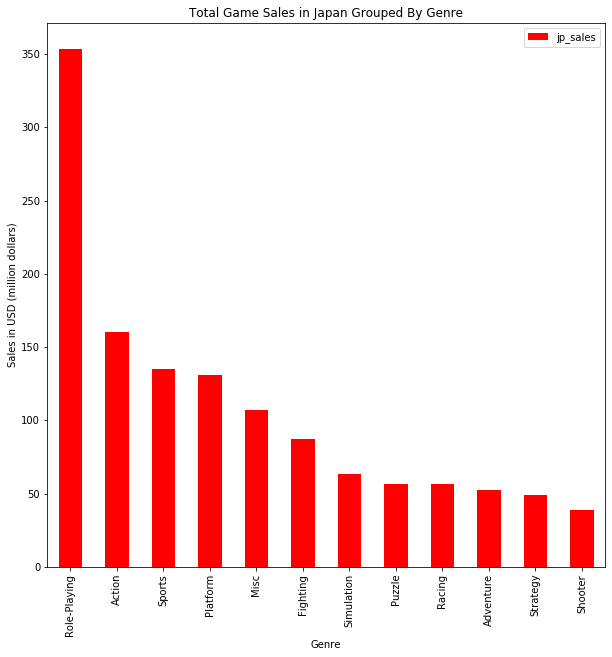

In [54]:
JP_genre = pd.pivot_table(JP_data, values='jp_sales', index=['genre'], aggfunc= np.sum)

JP_genre.sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(10,10),color='red')
plt.xlabel("Genre")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in Japan Grouped By Genre");

- Role-Playing Genre Games are most popular in Japan with total sales of 353.39 million dollars.
- The second most popular genre in Japan is Action with sales of 160.14 million dollars followed by Sports.
- The top 5 popular genre games sold in Japan are **Role-Playing, Action, Sports, Platform, and Misc**.
- The least popular genre game in Japan are **Strategy** and **Shooter**.

- People in Japan has abit different taste of game than people in Europe and North America. Role-playing Games are most popular in Japan and Shooter games are the least populat games, while in North America and Europe Shooter games are the most popular games while Role-playing games falls in the middle.

**Total Sales in North America, Europe and Japan Grouped by ESBR Rating**

        na_sales
rating          
E        1972.25
T        1154.93
M         863.39
E10+      345.50
K-A         2.56


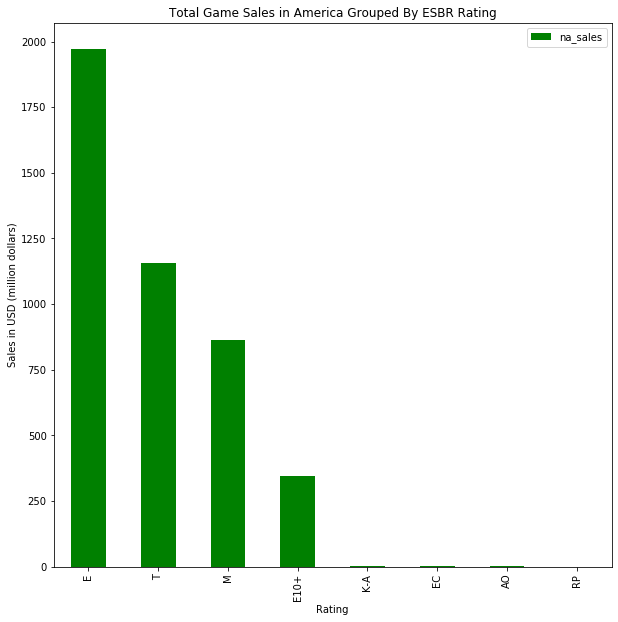

In [55]:
NA_rating = pd.pivot_table(NA_data, values='na_sales', index=['rating'], aggfunc= np.sum)
print(NA_rating.sort_values(by='na_sales', ascending=False).head())

NA_rating.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(10,10),color='green')
plt.xlabel("Rating")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in America Grouped By ESBR Rating");

        eu_sales
rating          
E        1062.12
T         628.68
M         524.51
E10+      183.35
AO          0.61
K-A         0.27
EC          0.11
RP          0.03


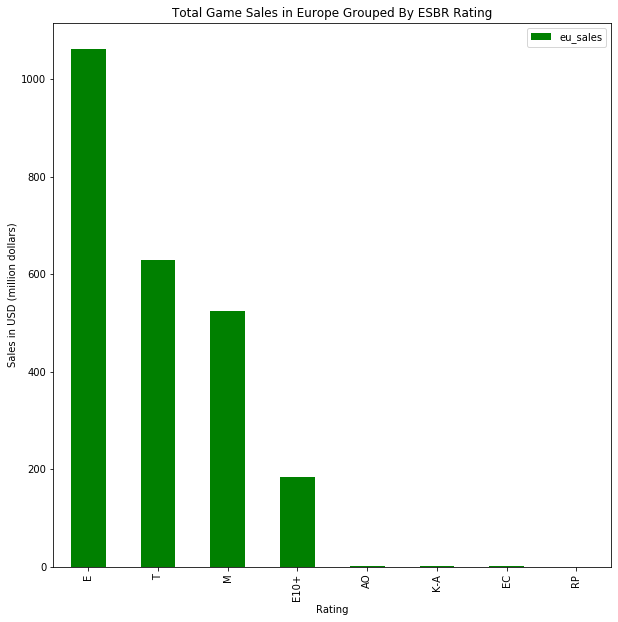

In [56]:
EU_rating = pd.pivot_table(EU_data, values='eu_sales', index=['rating'], aggfunc= np.sum)
print(EU_rating.sort_values(by='eu_sales', ascending=False))

EU_rating.sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(10,10),color='green')
plt.xlabel("Rating")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in Europe Grouped By ESBR Rating");

        jp_sales
rating          
E         603.61
T         562.20
M          83.17
E10+       40.20
K-A         1.46
AO          0.00
EC          0.00
RP          0.00


Text(0.5, 1.0, 'Total Game Sales in Japan Grouped By ESBR Rating')

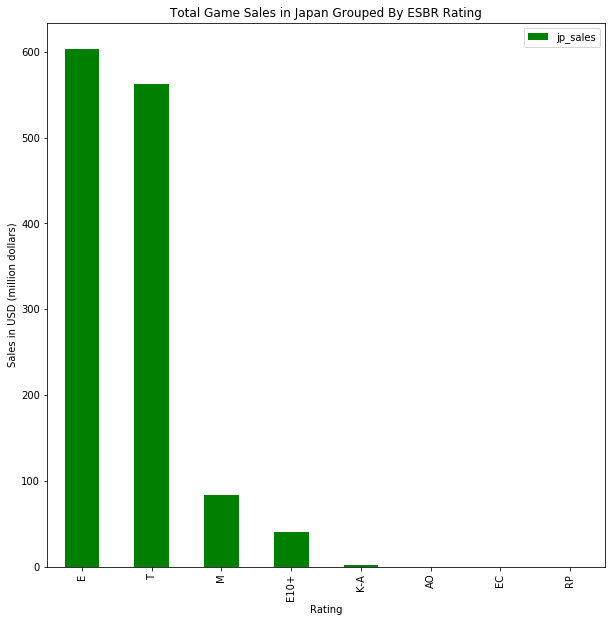

In [57]:
JP_rating = pd.pivot_table(JP_data, values='jp_sales', index=['rating'], aggfunc= np.sum)
print(JP_rating.sort_values(by='jp_sales', ascending=False))
JP_rating.sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(10,10),color='green')
plt.xlabel("Rating")
plt.ylabel("Sales in USD (million dollars)")
plt.title("Total Game Sales in Japan Grouped By ESBR Rating")


- It looks like most of the user ratings are 'E','T', 'M', and 'E10+', therefore we can see there are sales data only for those 4 ratings in all regions North America, Japan and Europe.

### Conclusion

**Total Sales in North America, Europe and Japan Grouped by Platforms**

**North America**:
- X360 Platform Games generate the highest amounnt of Sales in North American Countries with almost 600 million dollars in Sales.
- PS2 platform Games generates second highest amount of Sales in North America followed by Wii platform games.
- The top 5 popular platforms in North America are **X360, PS2, Wii, PS3, and DS**.
- The game platforms which are unpopular in North America are **SDC, SAT, 3DO, PCFX, NG, TG16 and WS**.

**Europe**:
- PS2 Platform Games generate the highest amount of Sales in European Countries with almost 330 million dollars in Sales.
- PS3 platform Games generates second highest amount of Sales (Approx.320 million dollars) in Europe followed by X360 platform games.
- The top 5 popular platforms in Europe are **PS2, PS3, X360, Wii, PS**.
- The most unpopular game platforms in Europe are **SAT, SDC, WS, TG16,PCFX,GG,3DO,NG** as they dont have any sales in Europe.

**Japan**:
- DS Platform Games dominates the market in japan with total sales of 175 million dollars.
- PS platform Games generates the second highest amount of Sales Revenue (Approx.135 million dollars) in Japan followed by PS2 platform games.
- The top 5 popular platforms in Japan are **DS, PS, PS2, SNES, and 3DS**.
- The most unpopular and unsold game platforms in Japan are **PC, TG16, 3DO,GG,PCFX,2600**.

**Total Sales in North America, Europe and Japan Grouped by Genre**

**North America**:
- Action Games are most popular in North America which has total sales of 863.17 million dollars.
- The second most popular genre in North America is Sports with sales of 671.20 million dollars.
- The top 5 popular genre games sold in North America are **Action, Sports, Shooter, Platform, and Misc**.
- The least popular genre game in North America are **Strategy** and **Adventure**

**Europe**:
- Action Games are most popular in Europe which has total sales of 510.99 million dollars.
- The second most popular genre in Europe is Sports with sales of 371.33 million dollars followed by Shooter.
- The top 5 popular genre games sold in Europe are **Action, Sports, Shooter, Racing, and Misc**.
- The least popular genre game in Europe are **Puzzle** and **Strategy**

**Japan**:
- Role-Playing Genre Games are most popular in Japan with total sales of 353.39 million dollars.
- The second most popular genre in Japan is Action with sales of 160.14 million dollars followed by Sports.
- The top 5 popular genre games sold in Japan are **Role-Playing, Action, Sports, Platform, and Misc**.
- The least popular genre game in Japan are **Strategy** and **Shooter**.


-- People in Japan has a little different taste of game than people in Europe and North America. Role-playing Games are most popular in Japan and Shooter games are the least populat games, while in North America and Europe Shooter games are the most popular games while Role-playing games falls in the middle.


**Total Sales in North America, Europe and Japan Grouped by ESBR Rating**

Most of the user ratings are 'E','T', 'M', and 'E10+'. Therefore, there are sales data only for those 4 ratings in all regions North America, Japan and Europe.

# Step 5:Test the Hypotheses

### Experiment 1
**Average user ratings of the Xbox One and PC platforms are the same.**

- **Null Hypotheses**: There is no statistical significant differences between the average user ratings of the Xbox One and PC platforms.
- **Alternative Hypothesis**: There is statistical significant differences between the average user ratings of the Xbox One and PC platforms.

**I am choosing 0.05 for the value of alpha, which means there is 95% confidence that the conclusion of this test will be valid.**


In [58]:
Xbox_data= data.query('platform=="XOne"')
PC_data = data.query('platform=="PC"')

**TWo-Tailed t-test**

In [59]:
XOne_rating = Xbox_data['user_score']
PC_rating = PC_data['user_score']
XOne_observations = len(XOne_rating)
PC_observations=len(PC_rating)
print("XOne Rating Observation:",XOne_observations)
print("PC Rating Observation:",PC_observations)

degrees_of_freedom = XOne_observations + PC_observations  - 2
print("Degrees_of_freedom:",degrees_of_freedom)

XOne Rating Observation: 247
PC Rating Observation: 957
Degrees_of_freedom: 1202


In [60]:
alpha = 0.05
two_tailed_test_prob_tail = alpha/2
t_critical = round(st.t.ppf(two_tailed_test_prob_tail, degrees_of_freedom),3)
print("t-critical",t_critical)

t-critical -1.962


- Since this is a two-tailed test, the t-critical value is actually ±1.961

In [61]:
tStat, pValue = st.ttest_ind(XOne_rating, PC_rating, equal_var = False, nan_policy='omit') #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:1.2855599263189025e-05 T-Statistic:-4.416037778716595


From the experiment above, we got 2 conclusions:

  - P-value is less than 0.05 or value of alpha.
  - T-statistic value is less than calculated critical value.
We do not have enough evidence support either hypothesis.

So, I want to conduct another hypothesis test: Levene Test.

**Levene Test**

In [62]:
print(XOne_rating.mean(), XOne_rating.median())
print(PC_rating.mean(), PC_rating.median())

6.7615384615384615 7.1
7.165099268547545 7.5


- There is not much variance in median and mean, so I will use Mean for the Test

In [63]:
st.levene(XOne_rating, PC_rating, center='mean')

LeveneResult(statistic=0.903575223614214, pvalue=0.3420159550518167)

**Conclusion 1**: From the Levene test above, we can not reject the null hypothses with 2 basis in the experiment above:
1. P-value is greater than 0.05 or value of alpha.
2. T-statistic value is less than calculated critical value.

Therefore, we do not have enough evidence to reject the null hypothesis. So we accept the null hypotheses that there is no statistical significant differences between the average user ratings of the Xbox One and PC platforms.

### Experiment 2
**Average user ratings for the Action and Sports genres are different**

- **Null Hypotheses**: The Average user ratings of the Action and Sports genre belongs to the same statistical population.
- **Alternative Hypothesis**: The Average user ratings of the Action and Sports genre does not belong to the same statistical population.

**I am choosing 0.05 for the value of alpha, which means there is 95% confidence that the conclusion of this test will be valid.**

In [64]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [65]:
action_data= data.query('genre=="Action"')
sports_data = data.query('genre=="Sports"')


In [66]:
action_rating = action_data['user_score']
sports_rating = sports_data['user_score']
action_observations = len(action_rating)
sports_observations=len(sports_rating)
print("XOne Rating Observation:",action_observations)
print("PC Rating Observation:",sports_observations)

degrees_of_freedom1 = action_observations + sports_observations  - 2
print("Degrees_of_freedom:",degrees_of_freedom1)

XOne Rating Observation: 3307
PC Rating Observation: 2306
Degrees_of_freedom: 5611


In [67]:
alpha = 0.05
two_tailed_test_prob_tail = alpha/2
t_critical = round(st.t.ppf(two_tailed_test_prob_tail, degrees_of_freedom1),3)
print("t-critical",t_critical)

t-critical -1.96


- Since this is a two-tailed test, the t-critical value is actually ±1.961

In [68]:
tStat1, pValue1 = st.ttest_ind(action_rating, sports_rating, equal_var = False, nan_policy='omit') #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue1,tStat1))

P-Value:0.4111044986220713 T-Statistic:0.8220238473703689


**Conclusion 2**: From the Two-tailed test above, we cannot reject the null hypothses with 2 basis in the experiment above:
1. P-value is greater than 0.05 or value of alpha.
2. T-statistic value is less than calculated critical value (1.96).

Therefore, we do not have enough evidence to reject the null hypothesis. So we accept the null hypotheses that The Average user ratings of the Action and Sports genre belongs to the same statistical population.

- We can also confirm the variation in the mean by calculating the R-Square value to see the proportion of difference.

In [69]:
r_squared_rating1 = round(tStat1**2 / (tStat1**2 + degrees_of_freedom1), 3)
r_squared_rating1

0.0

Our Value of R-Square is 0. That means, there is 0% differences between the Average rating of Actions and Sports genre.

### Conclusion

#### Experiment 1

**Average user ratings of the Xbox One and PC platforms are the same.**

- **Null Hypotheses**: There is no statistical significant differences between the average user ratings of the Xbox One and PC platforms.
- **Alternative Hypothesis**: There is statistical significant differences between the average user ratings of the Xbox One and PC platforms.

**I chose 0.05 for the value of alpha, which means there is 95% confidence that the conclusion of this test will be valid.**
**Levene Test**
- P-value: 0.34
- Test Statistics Value: 0.90
- Critical value = ±1.961

**Conclusion 1**:
From the Levene test above, we can not reject the null hypotheses with 2 basis in the experiment above:
1. P-value is greater than 0.05 or value of alpha.
2. T-statistic value is less than calculated critical value.

Therefore, we do not have enough evidence to reject the null hypothesis. So we accept the null hypotheses that there is no statistical significant differences between the average user ratings of the Xbox One and PC platforms.



#### Experiment 2
**Average user ratings for the Action and Sports genres are different**

- **Null Hypotheses**: The Average user ratings of the Action and Sports genre belongs to the same statistical population.
- **Alternative Hypothesis**: The Average user ratings of the Action and Sports genre does not belong to the same statistical population.

**I chose 0.05 for the value of alpha, which means there is 95% confidence that the conclusion of this test will be valid.**
**Two-Tailed t-test**
- P-value: 0.40
- Test Statistics Value: 0.83
- Critical value = ±1.961

**Conclusion 2**: From the Two-tailed test above, we cannot reject the null hypothses with 2 basis in the experiment above:
1. P-value is greater than 0.05 or value of alpha.
2. T-statistic value is less than calculated critical value (1.96).

Therefore, we do not have enough evidence to reject the null hypothesis. So we accept the null hypotheses that The Average user ratings of the Action and Sports genre belongs to the same statistical population.

Our Value of R-Square is 0. That means, there is 0% differences between the Average rating of Actions and Sports genre.

# Step 6: Conclusion

##  Loading Dataset and Studying General Information

1. We will be dealing with various datatypes in this dataset. We will need to change some datatypes into appropriate format such as **year_of_release** into datetime from float64.

2. We have missing values in the follwing columns and we will be filling in missing values where it is possible to do so:
    - **name**
    - **year_of_release**
    - **genre**
    - **critical_score**
    - **user_score**
    - **rating**
3. We observed the general statistical summary of the dataset.
4. We do not have any duplicates in the dataset.

## Data Preprocessing

In this module, I performed the following Task:

- Converted all column names to lowercase.
- Changed the type of year_of_release from float datatype to datatime
- Changed the type of user_score from string to numeric by setting **errors = 'coerce'** so that it will change all non-numeric values to **'NaN'**. In our case, 'tbh' is be converted into 'NaN'.
- We had very tiny percentage of missing values in columns **name**,**year_of_release**, and **genre**. I sliced them out from our data as we can delete missing values from our analysis without any risk if it is less than 10% of whole data. In our case, it is less than 2%.

For majority of data, we have missing values in critic_score and user_score with games that has low amount of sales. So that means, if there are no buyers or very small number of buyers, there is no or very little less chances of getting rating and reviews in the products.

- Filled in missing values in **rating** with the most repeated **rating value** grouped by its **genre**.
- Filled in missing values in **critic_score** and **user_score** columns with mean value grouped by its **genre**.
-  Calculated the total sales (the sum of sales in all regions) for each game and saved values in **total_sale** column.

##  Analyze the Data

**Total Games Released in Different Years**
- In 1980 there were only 9 games released. The game production spiked dramatically between 1993 and 2008 and hit all time highest game release of 1427 in 2008 and 1427 in 2009 and **declined** to **502** games release in 2016.
- The highest number of games were released between 2006 and 2011.

**Sales Grouped By Platforms**
- PS2 has the highest total sale of 1.233 billion dollars (in USD).
- The total sales distribution for **PS2** platform is **right skewed** for all years. That means **Mean value is greater than Median value** of total sales.

**Exploring Various Platforms and their Sales**
- Most of the platforms survived for only 6-8 years. It takes around 2-3 years for one platform to fade away and another platform to rise.
- The **DS, PSP**, and **PC** platforms survived in market for longer period of time.
- The **DS**, **GC** and **PS2** platform which once had highest sales that fell down to 0 in later years.

- The **SDC and NG** were some of the game platforms which were able to gain market for very less time during (2-4 years) during early and late 90s and faded away.
- The **3DO** platform could survive for a year and faded away.

**Observing the Platforms which Survived after 2014**
- **PS4** dominates the market in 2016 which is followed by WiiU and XOne even though these platforms are falling dowm by time.There 3 platforms were first released after 2012 and still are able to dominate the market.Hence, these are the most profitable platforms.
- PSP platform games are least sold game. However, it is only platform maintaining its steady growth so it has a potentiality to grow in future.

** **Wii, PS3, and PS4** are the most popular platforms.

- There is a weak positive relationship between the critic_score and total_sales.
- There is no relationship between user_score and total_sales.

The Sales distribution of games by genre is right skewed That means Mean value is greater than Median value of total sales.

##  Creating a User Profile for Each Region

**Total Sales in North America, Europe and Japan Grouped by Platforms**

**North America**:
- X360 Platform Games generate the highest amounnt of Sales in North American Countries with almost 600 million dollars in Sales.
- PS2 platform Games generates second highest amount of Sales in North America followed by Wii platform games.
- The top 5 popular platforms in North America are **X360, PS2, Wii, PS3, and DS**.
- The game platforms which are unpopular in North America are **SDC, SAT, 3DO, PCFX, NG, TG16 and WS**.

**Europe**:
- PS2 Platform Games generate the highest amount of Sales in European Countries with almost 330 million dollars in Sales.
- PS3 platform Games generates second highest amount of Sales (Approx.320 million dollars) in Europe followed by X360 platform games.
- The top 5 popular platforms in Europe are **PS2, PS3, X360, Wii, PS**.
- The most unpopular game platforms in Europe are **SAT, SDC, WS, TG16,PCFX,GG,3DO,NG** as they dont have any sales in Europe.

**Japan**:
- DS Platform Games dominates the market in japan with total sales of 175 million dollars.
- PS platform Games generates the second highest amount of Sales Revenue (Approx.135 million dollars) in Japan followed by PS2 platform games.
- The top 5 popular platforms in Japan are **DS, PS, PS2, SNES, and 3DS**.
- The most unpopular and unsold game platforms in Japan are **PC, TG16, 3DO,GG,PCFX,2600**.

**Total Sales in North America, Europe and Japan Grouped by Genre**

**North America**:
- Action Games are most popular in North America which has total sales of 863.17 million dollars.
- The second most popular genre in North America is Sports with sales of 671.20 million dollars.
- The top 5 popular genre games sold in North America are **Action, Sports, Shooter, Platform, and Misc**.
- The least popular genre game in North America are **Strategy** and **Adventure**

**Europe**:
- Action Games are most popular in Europe which has total sales of 510.99 million dollars.
- The second most popular genre in Europe is Sports with sales of 371.33 million dollars followed by Shooter.
- The top 5 popular genre games sold in Europe are **Action, Sports, Shooter, Racing, and Misc**.
- The least popular genre game in Europe are **Puzzle** and **Strategy**

**Japan**:
- Role-Playing Genre Games are most popular in Japan with total sales of 353.39 million dollars.
- The second most popular genre in Japan is Action with sales of 160.14 million dollars followed by Sports.
- The top 5 popular genre games sold in Japan are **Role-Playing, Action, Sports, Platform, and Misc**.
- The least popular genre game in Japan are **Strategy** and **Shooter**.


-- People in Japan has a little different taste of game than people in Europe and North America. Role-playing Games are most popular in Japan and Shooter games are the least populat games, while in North America and Europe Shooter games are the most popular games while Role-playing games falls in the middle.


**Total Sales in North America, Europe and Japan Grouped by ESBR Rating**

Most of the user ratings are 'E','T', 'M', and 'E10+'. Therefore, there are sales data only for those 4 ratings in all regions North America, Japan and Europe.

##  Test the Hypothesis

#### Experiment 1

**Average user ratings of the Xbox One and PC platforms are the same.**

- **Null Hypotheses**: There is no statistical significant differences between the average user ratings of the Xbox One and PC platforms.
- **Alternative Hypothesis**: There are statistical significant differences between the average user ratings of the Xbox One and PC platforms.

**I chose 0.05 for the value of alpha, which means there is 95% confidence that the conclusion of this test will be valid.**
**Levene Test**
- P-value: 0.34
- Test Statistics Value: 0.90
- Critical value = ±1.961

**Conclusion 1**:
From the Levene test above, we can not reject the null hypotheses with 2 basis in the experiment above:
1. P-value is greater than 0.05 or value of alpha.
2. T-statistic value is less than calculated critical value.

Therefore, we do not have enough evidence to reject the null hypothesis. So we accept the null hypotheses that there is no statistical significant differences between the average user ratings of the Xbox One and PC platforms.



#### Experiment 2
**Average user ratings for the Action and Sports genres are different**

- **Null Hypotheses**: The Average user ratings of the Action and Sports genre belongs to the same statistical population.
- **Alternative Hypothesis**: The Average user ratings of the Action and Sports genre does not belong to the same statistical population.

**I chose 0.05 for the value of alpha, which means there is 95% confidence that the conclusion of this test will be valid.**
**Two-Tailed t-test**
- P-value: 0.40
- Test Statistics Value: 0.83
- Critical value = ±1.961

**Conclusion 2**: From the Two-tailed test above, we cannot reject the null hypothses with 2 basis in the experiment above:
1. P-value is greater than 0.05 or value of alpha.
2. T-statistic value is less than calculated critical value (1.96).

Therefore, we do not have enough evidence to reject the null hypothesis. So we accept the null hypotheses that The Average user ratings of the Action and Sports genre belongs to the same statistical population.

Our Value of R-Square is 0. That means, there is 0% differences between the Average rating of Actions and Sports genre.